<a href="https://colab.research.google.com/github/ArjunDHP/Homography/blob/main/Homography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

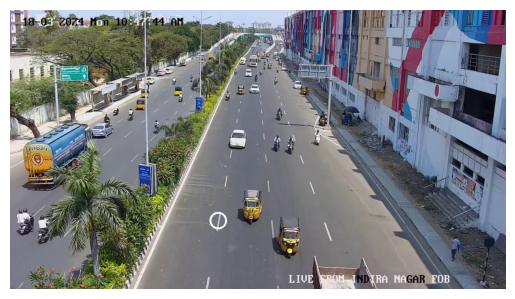


Real world object coordinates with respect to the camera (x,y): (5.36m, 12.21m)

Distance between the camera and the object: 13.337 metres

Homography Matrix:

 [[ 9.98999993e-03  0.00000000e+00 -3.84592537e-16]
 [ 0.00000000e+00  5.00000007e-03 -3.00462920e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Scaling Factor: 0.01


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot

#initializing given values
camheight = 12.21
w = 299.7
h = 10
cam_pos = np.array([0, 0, 0])
objectx = 537
objecty = 543

def homography(camheight, w, h):

  #converting the object dimensions from centimetres to metres
    winmetre = w / 100
    hinmetre = h / 100

 #set of 4 coordinates(x,y) in the image and real world used to establish relationship between points in the image and points in real world. Helps with transformation/mapping
    imagepoints = np.array([[0, 0], [300, 0], [300, 20], [0, 20]])
    realpoints = np.array([[0, 0], [winmetre, 0], [winmetre, hinmetre], [0, hinmetre]])

#unpacking values of cv2.findHomography function, it returns 2 values, the homography matrix and a mask, however i am not using the mask in this situation so i have ignored it in the code. i have kept the variable masknotused as a placeholder
    hmatrix, masknotused = cv2.findHomography(imagepoints, realpoints, cv2.RANSAC)

#calculating scaling factor using euclidian distance between 2 points in real world coordinates
#normalizes the value by dividing euclidian distance by reference distance taken as 299.7(given in problem)
    scalingf = np.linalg.norm(realpoints[1] - realpoints[0]) / 299.7
    return hmatrix, scalingf

#transforming the image coordinates to real world coordinates
def imagecords_to_realworldcords(hmatrix, pix):

  #creates homogenous representation of pixel coordinates, adding an extra dimension to each coordinate for transformation.
    homopixel = np.hstack((pix, np.ones((pix.shape[0], 1))))

#performing matrix multiplication to obtain real world coordinates. we transpose the matrix to make sure the dimensions of the matrix are suitable for multiplication
    realcords = np.dot(hmatrix, homopixel.T).T

#normalizing the coordinates still in homogenous form to get cartesian coordinates
    realcordsnormalized = realcords[:, :2] / realcords[:, 2:]
    return realcordsnormalized


#taking input image from user
picture = cv2.imread('/content/homography.jpg')

hmatrix, scalingf = homography(camheight, w, h)

#stores the values of the image coordinates and real world coordinates
ob_pixelcords = np.array([[objectx, objecty]])
ob_realworldcords = imagecords_to_realworldcords(hmatrix, ob_pixelcords)

#calculating camera poition coordinates in the real world (stays as (0,0) here since the camera is used as the starting reference point)
cam_realworldcords = np.array([0,0])

#as every point in the ground is the same level(assumed), we can take the y coordinate as the camera height the in real world
ob_realworldcords[0][1] = camheight

#calculating real world distance between camera and object
dist = np.linalg.norm(ob_realworldcords - cam_realworldcords)

#drawing a white circle over the object/point we are using and displaying it along with the original image
picwithcircle = picture.copy()
cv2.circle(picwithcircle, (objectx, objecty), 20, (255, 255, 255), 3)
plot.imshow(cv2.cvtColor(picwithcircle, cv2.COLOR_BGR2RGB))
plot.axis('off')
plot.show()

#displaying real world object coordinates, distance between camera and object, homography matrix and the scaling factor
print(f"\nReal world object coordinates with respect to the camera (x,y): ({ob_realworldcords[0][0]:.2f}m, {ob_realworldcords[0][1]:.2f}m)")
print(f"\nDistance between the camera and the object: {dist:.3f} metres")
print("\nHomography Matrix:")
print("\n",hmatrix)
print("\nScaling Factor:", scalingf)
